# 2012 election Obama vs. Romney

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#floating numbers
from __future__ import division

In [4]:
# data from HuffPost Pollster
# using Requests API
import requests

In [5]:
# StringIO for working with csv file in buffer
from StringIO import StringIO

In [6]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

In [7]:
poll_df = pd.read_csv(poll_data)

In [8]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null float64
Romney                    590 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
Question Text             0 non-null float64
Question Iteration        590 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.4+ KB


In [10]:
poll_df[1:5]

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


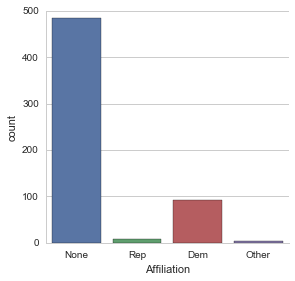

In [14]:
sns.factorplot('Affiliation',data = poll_df, kind ='count')

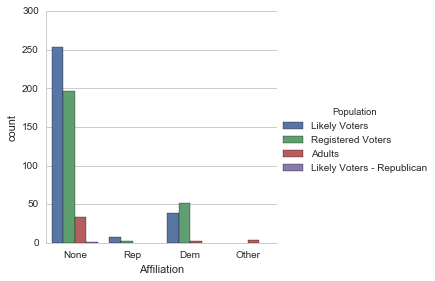

In [15]:
sns.factorplot('Affiliation',data=poll_df,
               hue='Population',kind = 'count')

In [20]:
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Question Text',
          'Question Iteration'],axis = 0,inplace = True)

In [21]:
avg

,0
Obama,46.774576
Romney,44.572881
Undecided,6.546099
Other,3.400990


In [22]:
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Text','Question Iteration'],
         axis = 0,inplace = True)

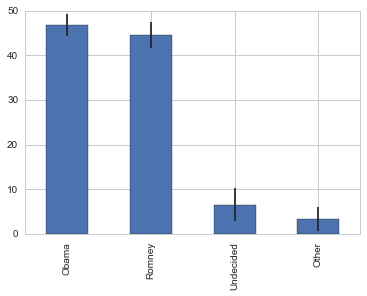

In [23]:
avg.plot(yerr = std,kind='bar',legend = False)

In [25]:
poll_avg = pd.concat([avg,std],axis = 1)
poll_avg.columns = ['Average','STD']

In [26]:
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Undecided,6.546099,3.698614
Other,3.400990,2.721318


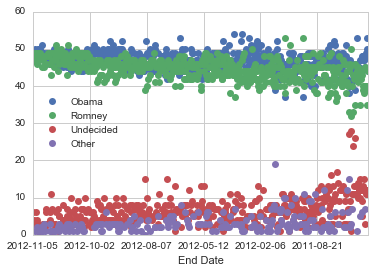

In [27]:
poll_df.plot(x='End Date',y = ['Obama','Romney','Undecided','Other'],
            linestyle = '',marker = 'o')

In [28]:
#the difference between Obama and Romney vs time
from datetime import datetime

In [29]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [30]:
poll_df = poll_df.groupby(['Start Date'],as_index = False).mean()

In [32]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


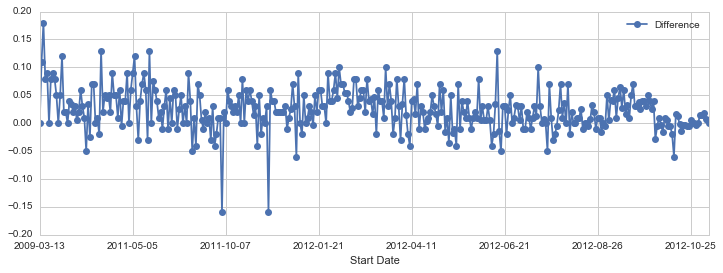

In [33]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker = 'o')

In [23]:
sns.jointplot('Obama','Romney', poll_df,kind = 'scatter')

NameError: name 'poll_df' is not defined

In [34]:
#find the index limit of the debate month
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
print min(xlimit)
print max(xlimit)

329
356


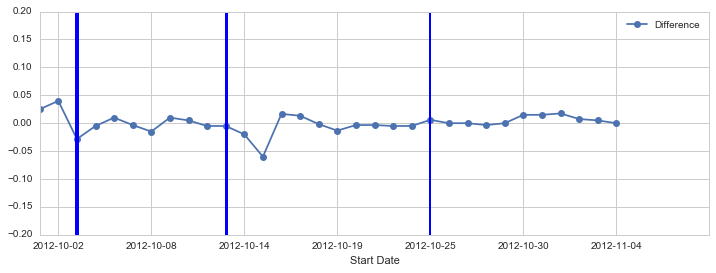

In [37]:
poll_df.plot('Start Date','Difference',figsize=(12,4),
             marker = 'o',xlim=(329,365))
#Oct 3rd, index = 329 is in Oct 1st
plt.axvline(x=329+2,linewidth = 4)
# Oct 11th
plt.axvline(x=329+10,linewidth = 3)
#Oct 
plt.axvline(x=329+21,linewidth = 2)

# 2016 election Trump vs. Clinton

In [6]:
election = pd.read_csv('2016-general-election-trump-vs-clinton.csv')

In [7]:
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,881.0,Likely Voters,IVR/Online,37.0,42.0,5.0,10.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1
1,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,NaN,Likely Voters - Democrat,IVR/Online,7.0,74.0,7.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1
2,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,NaN,Likely Voters - Republican,IVR/Online,76.0,10.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1
3,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,NaN,Likely Voters - independent,IVR/Online,37.0,32.0,6.0,16.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1
4,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,881.0,Likely Voters,IVR/Online,43.0,48.0,NaN,9.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,If you had to choose between just Democrat Hil...,2


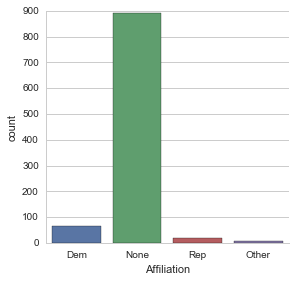

In [8]:
sns.factorplot('Affiliation',data = election, kind ='count')

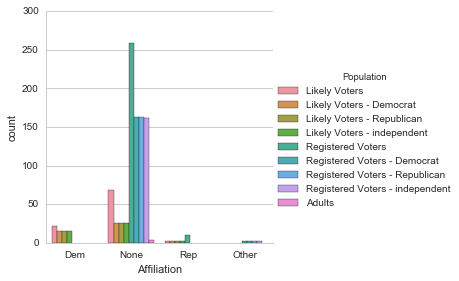

In [9]:
sns.factorplot('Affiliation',data=election,
               hue='Population',kind = 'count')

In [12]:
avg = pd.DataFrame(election.mean())
avg.drop(['Number of Observations',
          'Question Iteration'],axis = 0,inplace = True)

In [13]:
avg

,0
Trump,40.413793
Clinton,42.965517
Other,6.438742
Undecided,10.670927


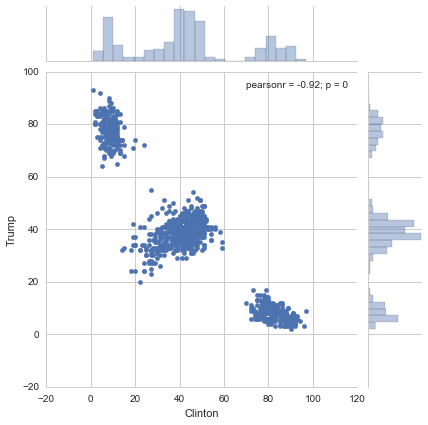

In [17]:
sns.jointplot('Clinton','Trump', election,kind = 'scatter')

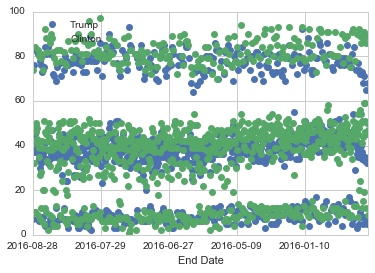

In [19]:
election.plot(x='End Date',y = ['Trump','Clinton'],
            linestyle = '',marker = 'o')

In [21]:
from datetime import datetime
election['Difference'] = (election.Clinton - election.Trump)/100
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,881.0,Likely Voters,IVR/Online,37.0,42.0,5.0,10.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1,0.05
1,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,NaN,Likely Voters - Democrat,IVR/Online,7.0,74.0,7.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1,0.67
2,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,NaN,Likely Voters - Republican,IVR/Online,76.0,10.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1,-0.66
3,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,NaN,Likely Voters - independent,IVR/Online,37.0,32.0,6.0,16.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,The candidates for President are Democrat Hill...,1,-0.05
4,PPP (D),2016-08-26,2016-08-28,2016-08-30T15:47:07Z,881.0,Likely Voters,IVR/Online,43.0,48.0,NaN,9.0,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2015/PP...,Pollster,Dem,If you had to choose between just Democrat Hil...,2,0.05


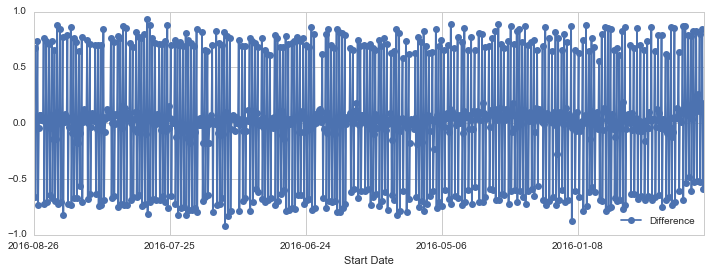

In [24]:
election.plot('Start Date','Difference',figsize=(12,4),marker = 'o')